In [ ]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
#file_path = '/content/'+ <File_Name.csv>
# Conventions: Results_mBYXX_Y_Z_<side>_<Marker>_DDMMYY_HHMMSS.csv
#          XX: Animal Number
#           Y: Slide Number
#           Z: Slice Number

def load_fluorescence_data(file_path):
  headers = ['Label','Area','Mean','StdDev']
  df = pd.read_csv(file_path,names=headers)
  return df

In [ ]:
def load_cell_count_data(file_path):
  headers = ['Slice','Count','AverageSize','Area', "Mean"]
  df = pd.read_csv('/content/Results_mBY15_2_4_rightside_CellCount.csv',names=headers)

In [ ]:
# Define Regex Constants
regex_GFAP = ".*Red.*roi_[0-9]+.*"
regex_IgG = ".*Green.*roi_[0-9]+.*"
regex_CD68 = ".*Blue.*roi_[0-9]+.*"

regex_GFAP_background = ".*Red.*background.*"
regex_IgG_background = ".*Green.*background.*"
regex_CD68_background = ".*Blue.*background.*"

In [ ]:
def plot_intensity_scatter(marker, x, y, background):
  # Extract Distance from Implant
  x = x.apply(lambda x: x.rpartition('_')[2])
  y = y.astype(float)

  # Plot
  plt.scatter(x,y)
  plt.axhline(y=float(background[0]), color='r', linestyle='-')
  plt.xlabel('Distance from Implant (um)')
  plt.ylabel('Absolute Pixel Intensity')
  plt.title(marker)
  plt.show()

In [ ]:
def plot_intensity_profile(marker, x, y, background):
  # Extract Distance from Implant
  x = x.apply(lambda x: x.rpartition('_')[2])
  y = y.astype(float)

  min = float(background[0])
  max = y.max()
  mean = statistics.mean([min, y.mean()])
  y = (y - mean)/(max - min)

  # Plot
  plt.plot(x,y)
  plt.xlabel('Distance from Implant (um)')
  plt.ylabel('Normalized Fluorescent Intensity')
  plt.title(marker)
  plt.show()

In [ ]:
def plot_cell_count_profile(marker, x, y, background):
  # Extract Distance from Implant
  x = x.apply(lambda x: x.rpartition('_')[2])
  y = y.astype(float)
  y = (y/float(background[0]))*10e2

  # Plot
  plt.plot(x,y)
  plt.xlabel('Distance from Implant (um)')
  plt.ylabel('Percent of Background')
  plt.title(marker)
  plt.show()

In [ ]:
def plot_GFAP(df):

  background_GFAP = df[df['Label'].str.contains(regex_GFAP_background)]
  df_GFAP = df[df['Label'].str.contains(regex_GFAP)]

  plot_intensity_scatter("GFAP", df_GFAP['Label'], df_GFAP['Mean'], background_GFAP['Mean'])
  plot_intensity_profile("GFAP", df_GFAP['Label'], df_GFAP['Mean'], background_GFAP['Mean'])

In [ ]:
def plot_IgG(df):

  background_IgG = df[df['Label'].str.contains(regex_IgG_background)]
  df_IgG = df[df['Label'].str.contains(regex_IgG)]

  plot_intensity_scatter("IgG", df_IgG['Label'], df_IgG['Mean'], background_IgG['Mean'])
  plot_intensity_profile("IgG", df_IgG['Label'], df_IgG['Mean'], background_IgG['Mean'])

In [ ]:
def plot_CD68(df):
  
  background_CD68 = df[df['Label'].str.contains(regex_CD68_background)]
  df_CD68 = df[df['Label'].str.contains(regex_CD68)]

  plot_intensity_profile("CD68", df_CD68['Label'], df_CD68['Mean'], background_CD68['Mean'])
  plot_intensity_profile("CD68", df_CD68['Label'], df_CD68['Mean'], background_CD68['Mean'])

In [ ]:
# Load Dataframes
file_path_fluorescence = '/content/'+'Results_mBY15_2_4_rightside_Red_11_2040_98.csv'
df_fluorescence = load_fluorescence_data(file_path_fluorescence)

file_path_cell_count = ''
#df_cell_count = load_cell_count_data()

Fluorescene Profile

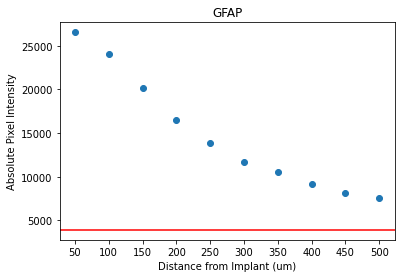

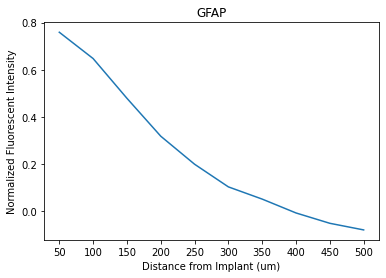

In [ ]:
plot_GFAP(df_fluorescence) # Red; GFAP; Astrocytes

In [ ]:
plot_IgG(df_fluorescence) # Green; IgG; BBB

In [ ]:
plot_CD68(df_fluorescence) # Blue; CD68; Glia

Cell Count Profile

In [ ]:
#plot_cell_count_profile("Neuronal Nuceli", df_['Label'], df_['Count'], 3051.848) # NeuroTrace